In [12]:
import scipy
import numpy
import matplotlib
import numpy as np
import os
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
get_ipython().magic(u'matplotlib inline')

from __future__ import division

In [13]:
lam=40E-3
w0=250E-3
z0=np.pi*w0*w0/lam
R=2
k=2*np.pi/lam
mstar=0.067*9.1094E-31
hbar=1.0545718E-34
e=1.6E-19
E=0.002*e
omega=E/hbar

def width(l):
    return np.sqrt(w0*w0*(1+l*l/(z0*z0)))
def radiusin(l):
    return l+z0*z0/l
def radius(m,l):
    rr=2/np.sqrt((mstar*omega/(2*hbar)))*1E6
    for i in range(0,m):
                rr=rr+l+z0*z0/l
                rr=rr*R/(R-2*rr)
    return rr
def theta(l):
    return np.arctan(l/z0) 

-1.08358216602
14.0478569349
4.90873852123


In [14]:
def H1(x,y):
    return 1

def H2(x,y):
    return 2*(np.sqrt(2)*y/width(x))

def H3(x,y):
    return 4*(np.sqrt(2)*(y/width(x)))**2-2

def H4(x,y):
    return 8*(np.sqrt(2)*(y/width(x)))**3-12*(np.sqrt(2)*(y/width(x)))

def H5(x,y):
    return 16*(np.sqrt(2)*(y/width(x)))**4-48*(np.sqrt(2)*(y/width(x)))**2+12

def H6(x,y):
    return 32*(np.sqrt(2)*(y/width(x)))**5-160*(np.sqrt(2)*(y/width(x)))**3+120*(np.sqrt(2)*(y/width(x)))

def H7(x,y):
    return 64*(np.sqrt(2)*(y/width(x)))**6-480*(np.sqrt(2)*(y/width(x)))**4+720*(np.sqrt(2)*(y/width(x)))**2-120

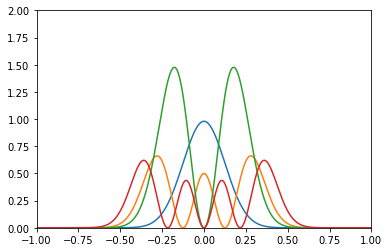

In [16]:
m=10
kk=0.1
def psi0p(y,l,m,kk):
    psi=np.exp(-1j*(k-1j*kk)*l)    
    return psi
def psi1p(y,l,m,kk):
    psi=w0/width(l)*H1(l,y)*np.exp(-y*y/np.power(width(l),2))*np.exp(-1j*(k-1j*kk)*y*y/(2*radius(m,l)))*np.exp(-1j*(k-1j*kk)*l+1j*theta(l))    
    return psi
def psi1pin(y,l,m,kk):
    psi=w0/width(l)*H1(l,y)*np.exp(-y*y/np.power(width(l),2))*np.exp(-1j*(k-1j*kk)*y*y/(2*radius(m,l)))*np.exp(-1j*(k-1j*kk)*l+1j*theta(l))    
    return np.power(abs(psi),2)
def psi2p(y,l,m,kk):
    psi=w0/width(l)*H2(l,y)*np.exp(-y*y/np.power(width(l),2))*np.exp(-1j*(k-1j*kk)*y*y/(2*radius(m,l)))*np.exp(-1j*(k-1j*kk)*l+3/2*1j*theta(l))    
    return psi
def psi2pin(y,l,m,kk):
    psi=w0/width(l)*H2(l,y)*np.exp(-y*y/np.power(width(l),2))*np.exp(-1j*(k-1j*kk)*y*y/(2*radius(m,l)))*np.exp(-1j*(k-1j*kk)*l+3/2*1j*theta(l))    
    return np.power(abs(psi),2)
def psi3p(y,l,m,kk):
    psi=w0/width(l)*H3(l,y)*np.exp(-np.power(y*np.sqrt(2)/width(l),2)/2)*(1/np.sqrt(8))*np.exp(-1j*(k-1j*kk)*y*y/(2*radius(m,l)))*np.exp(-1j*(k-1j*kk)*l+5/2*1j*theta(l))    
    return psi
def psi3pin(y,l,m,kk):
    psi=w0/width(l)*H3(l,y)*np.exp(-np.power(y*np.sqrt(2)/width(l),2)/2)*(1/np.sqrt(8))*np.exp(-1j*(k-1j*kk)*y*y/(2*radius(m,l)))*np.exp(-1j*(k-1j*kk)*l+5/2*1j*theta(l))    
    return np.power(abs(psi),2)
def psi4p(y,l,m,kk):
    psi=w0/width(l)*H4(l,y)*np.exp(-np.power(y*np.sqrt(2)/width(l),2)/2)*(1/np.sqrt(48))*np.exp(-1j*(k-1j*kk)*y*y/(2*radius(m,l)))*np.exp(-1j*(k-1j*kk)*l+7/2*1j*theta(l))    
    return psi
def psi4pin(y,l,m,kk):
    psi=w0/width(l)*H4(l,y)*np.exp(-np.power(y*np.sqrt(2)/width(l),2)/2)*(1/np.sqrt(48))*np.exp(-1j*(k-1j*kk)*y*y/(2*radius(m,l)))*np.exp(-1j*(k-1j*kk)*l+7/2*1j*theta(l))    
    return np.power(abs(psi),2)

x=np.linspace(-1, 1, num=1000)
y=np.linspace(-2, 2, num=1000)
y2=np.linspace(-2, 2, num=1000)
y3=np.linspace(-2, 2, num=1000)
y4=np.linspace(-2, 2, num=1000)

for i in range(1,1000):
    y[i]=psi2pin(x[i],0.0001,20,kk)
for i in range(1,1000):
    y2[i]=psi1pin(x[i],0.1,20,kk)
for i in range(1,1000):
    y3[i]=psi3pin(x[i],0.00001,m,kk)
for i in range(1,1000):
    y4[i]=psi4pin(x[i],0.00001,m,kk)

3.72240387128e-07


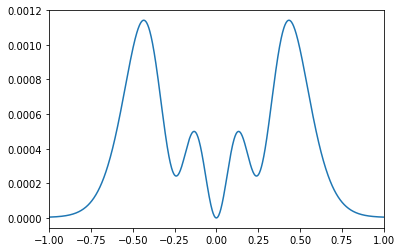

In [19]:
import scipy.integrate as integrate
def psisum0(y,l,r,m,kk):
    summ0=0
    for i in range(1,m):
        summ0=summ0+(1-r)*np.power(r,i)*psi0p(y,l*i,i,kk)
    #print summ
    return np.power(abs(summ0),2)
def psisum1(y,l,r,m,kk):
    summ1=0
    for i in range(1,m):
        summ1=summ1+(1-r)*np.power(r,i)*psi1p(y,l*i,i,kk)
    #print summ
    return np.power(abs(summ1),2)
def psisum2(y,l,r,m,kk):
    summ2=0
    for i in range(1,m):
        summ2=summ2+(1-r)*np.power(r,i)*psi2p(y,l*i,i,kk)
    #print summ
    return np.power(abs(summ2),2)
def psisum3(y,l,r,m,kk):
    summ3=0
    for i in range(1,m):
        summ3=summ3+(1-r)*np.power(r,i)*psi3p(y,l*i,i,kk)
    #print summ
    return np.power(abs(summ3),2)
def psisum4(y,l,r,m,kk):
    summ4=0
    for i in range(1,m):
        summ4=summ4+(1-r)*np.power(r,i)*psi4p(y,l*i,i,kk)
    #print summ4
    return np.power(abs(summ4),2)

In [21]:
from scipy.integrate import quad
def intens0(l,r,m,kk):
    return quad(psisum0, -1, 1, args=(l,r,m,kk))[0]
def intens1(l,r,m,kk):
    return quad(psisum1, -1, 1, args=(l,r,m,kk))[0]
def intens1in(l,m,kk):
    return quad(psi1pin, -1, 1, args=(l,m,kk))[0]
def intens2(l,r,m,kk):
    return quad(psisum2, -1, 1, args=(l,r,m,kk))[0]
def intens2in(l,m,kk):
    return quad(psi2pin, -1, 1, args=(l,m,kk))[0]
def intens3(l,r,m,kk):
    return quad(psisum3, -1, 1, args=(l,r,m,kk))[0]
def intens3in(l,m,kk):
    return quad(psi3pin, -1, 1, args=(l,m,kk))[0]
def intens4(l,r,m,kk):
    return quad(psisum4, -1, 1, args=(l,r,m,kk))[0]
def intens4in(l,m,kk):
    return quad(psi4pin, -1, 1, args=(l,m,kk))[0]
print (intens4(0.0001,0.9,100,0.1))

0.250996171331


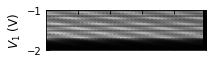

In [130]:
import matplotlib.gridspec as gridspec
#plt.rc('font', family='serif')
import matplotlib.patches as patches

fig = plt.figure()
gs = gridspec.GridSpec(4,5)
gs.update(left=0, right=1, wspace=0.3, hspace=0.5)

ax1 = plt.subplot(gs[0:1, 0:2])
plt.imshow(np.transpose(exp1),aspect='auto',cmap='Greys_r', extent=[-2,0,-2,-0.800])
plt.tick_params(direction='in',labeltop=False, labelbottom=False, bottom=True, top=True, labelright=False,labelleft=True)
plt.xlim(-1.5,-2)
plt.ylim(-2,-1)
plt.axhline(y=-1.7, color='k', linestyle='dotted',lw=0.5)
plt.axhline(y=-1.6, color='k', linestyle='dotted',lw=0.5)
plt.axhline(y=-1.5, color='k', linestyle='dotted',lw=0.5)
plt.axhline(y=-1.4, color='k', linestyle='dotted',lw=0.5)
plt.axhline(y=-1.3, color='k', linestyle='dotted',lw=0.5)
plt.axhline(y=-1.21, color='k', linestyle='dotted',lw=0.5)
plt.axhline(y=-1.14, color='k', linestyle='dotted',lw=0.5)
plt.axhline(y=-1.07, color='k', linestyle='dotted',lw=0.5)
plt.axhline(y=-1.0, color='k', linestyle='dotted',lw=0.5)
plt.ylabel("$V_{1}$ (V)", color='k',fontsize=12)

In [ ]:
r=0.5
res1=np.linspace(4.2, 3.6, num=178)
for i in range(1,178):
 #   res0[i]=intens0(z[i],r,m,kk)
        res1[i]=intens0(z[i],r,m,kk)
plt.plot(res1)
#plt.ylim(0,0.01)
r=4
res1=np.linspace(4.2, 3.6, num=178)
for i in range(1,178):
 #   res0[i]=intens0(z[i],r,m,kk)
        res1[i]=intens0(z[i],r,m,kk)
plt.plot(res1)
#plt.ylim(0,0.01)

In [ ]:
#Fit the Gaussian beam data
#!/usr/bin/env python
#<examples/doc_basic.py>
from lmfit import minimize, Minimizer, Parameters, Parameter, report_fit
import numpy as np
m=3
# create data to be fitted


exp1 = np.fromfile("D:\\fits\\temperature\\250mK.dat",dtype=float,count=-1, sep=" ")
exp1.shape
exp1 = np.reshape(exp1, (-1,2))
exp2 = exp1.transpose()


x=(exp2[0,1:179])
data=exp2[1,1:179]
z=np.linspace(3.6, 4.2, num=178)
res4=np.linspace(4.2, 3.6, num=178)

def fcn2min(params, x, data):
    r = params['r']
    kk = params['kk']
    for i in range(1,150):
        #res2[i]=intens2(x[i],r,m,kk)/intens2in(0.00001,m,kk)
        res0[i]=intens0(x[i],r,m,kk)
    return res2 - data

# create a set of Parameters
    params = Parameters()
    params.add('r',   value= 0.9, min=0.7, max=0.99)
#params.add('kk', value= 0.5, min=0.0001, max=1 )
    
   

# do fit, here with leastsq model
    minner = Minimizer(fcn2min, params, fcn_args=(x, data))
    kws  = {'options': {'maxiter':100}}
    result = minner.minimize()
    result.params

# calculate final result
    final = data + result.residual
    
# write error report
    report_fit(result)
     
# try to plot results
    plt.plot(z, data, 'o')
    plt.plot(z, final, 'r')

    params2=result.params
    v = params2.valuesdict()
    print ('r=', v['r'])
    
    #plt.ylim(9,10)
    #params2=result.params
    #v = params2.valuesdict()
    #a[1,i]=v['b']
#plt.savefig('D:\\sl2.pdf', format='pdf')

In [ ]:
##Fit the plane wave data

import scipy
import numpy
import matplotlib
import numpy as np
import os
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
get_ipython().magic(u'matplotlib inline')

from scipy import interpolate

from __future__ import division

mstar=0.067*9.1094E-31
e=1.6E-19
vF=2.41E5
w0=250E-9
L=2.3E-6
R=750E-9
w=185E-9
lambdaF=45E-9

vFSR=vF/(2*L)
zr=np.pi*w0*w0/lambdaF
wL=w0*np.sqrt(1+(L/zr)**2)

Imax=8.15E-10
Imin=9.84E-12

#def L(vL):
 #   return 2.3E-6-10*lambdaF*vL


expa1 = np.fromfile("D:\\fits\\1Q2_2Q2_Oscillations.dat",dtype=float,count=-1, sep=" ")

expa1 = np.reshape(expa1, (-1,2))
expa2 = expa1.transpose()

#exp2.ndim
 

    
from lmfit import minimize, Minimizer, Parameters, Parameter, report_fit
import numpy as np

for i in range(1,2):
    x=expa2[0,1:-1]
    data=expa2[1,1:-1]
    def fcn2min(params, x, data):
         #model, subtract data
        F = params['F']
        n = params['n']
        Imax = params['Imax']
        #L = params['L']
        f1 = Imax/(1+F*(np.sin((2*np.pi*(2.3E-6-n*lambdaF*x))/lambdaF))**2)
        model=f1
        return model - data

    params = Parameters()
    params.add('F', value=5, min=0.1, max=10)
    params.add('Imax', value= 1E-10 , min=1E-11 , max=1E-9)
    params.add('n', value=3.8,  min=2, max=10)
    #params.add('L', value= 2E-6, min=1.5E-6, max=2.3E-6)

    minner = Minimizer(fcn2min, params, fcn_args=(x, data))
    kws  = {'options': {'maxiter':1000}}
    result = minner.minimize()
    result.params

    final = data + result.residual
    
    report_fit(result)

    plt.plot(x, data, 'o')
    plt.plot(x, final, 'r')

    params2=result.params
    v = params2.valuesdict()